**Global Interpreter Lock aka GIL**

GIL allows only one thread to have control onthe Python interpreter which means only one thread can is executed at any point of time. 

https://realpython.com/python-gil/

# Multithreading

**Single thread, single process**

In [1]:
import urllib.request

In [2]:
urls = [
  'http://www.python.org',
  'https://docs.python.org/3/',
  'https://docs.python.org/3/whatsnew/3.7.html',
  'https://docs.python.org/3/tutorial/index.html',
  'https://docs.python.org/3/library/index.html',
  'https://docs.python.org/3/reference/index.html',
  'https://docs.python.org/3/using/index.html',
  'https://docs.python.org/3/howto/index.html',
  'https://docs.python.org/3/installing/index.html',
  'https://docs.python.org/3/distributing/index.html',
  'https://docs.python.org/3/extending/index.html',
  'https://docs.python.org/3/c-api/index.html',
  'https://docs.python.org/3/faq/index.html'
  ]

In [4]:
%%time
results = []
for url in urls:
    with urllib.request.urlopen(url) as src:
        results.append(src)

CPU times: user 187 ms, sys: 16.6 ms, total: 203 ms
Wall time: 1.72 s


**Multi-threading**

The multithreading library is lightweight, shares memory, responsible for responsive UI and is used well for I/O bound applications. 

Multiple threads live in the same process in the same space, each thread will do a specific task, have its own code, own stack memory, instruction pointer, and share heap memory. 

Multiple threads can significantly speed up many tasks that are IO-bound. IO-bound programs spend most of the time waiting for input/output. Multithreading is very useful in scenarios like webscrapping.

In [6]:
import urllib.request
from concurrent.futures import ThreadPoolExecutor

In [7]:
%%time

with ThreadPoolExecutor(4) as executor:
    results = executor.map(urllib.request.urlopen, urls)

CPU times: user 141 ms, sys: 14.2 ms, total: 155 ms
Wall time: 879 ms


In [8]:
%%time

with ThreadPoolExecutor(8) as executor:
    results = executor.map(urllib.request.urlopen, urls)

CPU times: user 156 ms, sys: 15.9 ms, total: 172 ms
Wall time: 817 ms


In [9]:
%%time

with ThreadPoolExecutor(16) as executor:
    results = executor.map(urllib.request.urlopen, urls)

CPU times: user 139 ms, sys: 15.1 ms, total: 154 ms
Wall time: 464 ms


# Multi-processing

Multiprocessing uses multiple processes. 

Each process gets its own interpreter and memory space, so the GIL(Global Interpreter library) won’t be holding things back. 

Multiprocessing spawns a separate interpreter, and assigns a separate memory space for each process.

There are 2 main objects in multiprocessing to implement parallel execution of a function: The Pool Class and the Process Class.

If you spawn more processes than your CPU can handle at a time, you will notice your performance starting to drop. This is because the operating system now has to do more work swapping processes in and out of the CPU cores since you have more processes than cores. 

In [15]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  12


In [25]:
import os
from multiprocessing import Process, current_process
 
 
def doubler(number):
    """
    A doubling function that can be used by a process
    """
    result = number * 2
    proc_name = current_process().name
    print('{0} doubled to {1} by: {2}'.format(
        number, result, proc_name))
 
 
if __name__ == '__main__':
    numbers = [5, 10, 15, 20, 25, 100, 200, 1000, 75, 85, 2000]
    procs = []
    proc = Process(target=doubler, args=(5,))
 
    for index, number in enumerate(numbers):
        proc = Process(target=doubler, args=(number,))
        procs.append(proc)
        proc.start()
 
    proc = Process(target=doubler, name='Test', args=(2,))
    proc.start()
    procs.append(proc)
 
    for proc in procs:
        proc.join()

5 doubled to 10 by: Process-365
10 doubled to 20 by: Process-366
15 doubled to 30 by: Process-367
20 doubled to 40 by: Process-368
25 doubled to 50 by: Process-369
100 doubled to 200 by: Process-370
200 doubled to 400 by: Process-371
1000 doubled to 2000 by: Process-372
75 doubled to 150 by: Process-373
85 doubled to 170 by: Process-374
2000 doubled to 4000 by: Process-375
2 doubled to 4 by: Test


https://sebastianraschka.com/Articles/2014_multiprocessing.html

# Dask DataFrame

Dask is an Open Source library that  provides abstractions over NumPy Arrays, Pandas Dataframes and regular lists, allowing you to run operations on them in parallel, using multicore processing.
https://docs.dask.org/en/latest/

A **Dask DataFrame** is a large parallel DataFrame composed of many smaller Pandas DataFrames, split along the index. These Pandas DataFrames may live on disk for larger-than-memory computing on a single machine, or on many different machines in a cluster. One Dask DataFrame operation triggers many operations on the constituent Pandas DataFrames.

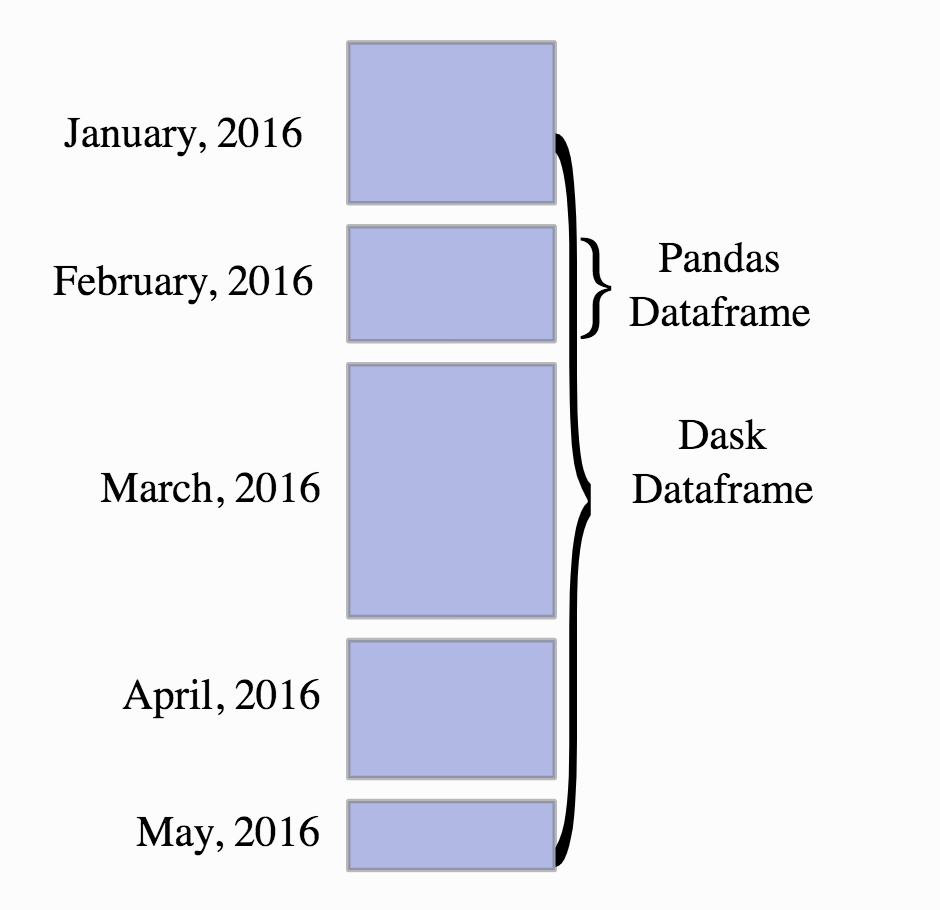

In [61]:
from IPython.display import Image
Image("dask-dataframe.png")

In [26]:
import dask.dataframe as ddf
import pandas as pd

In [33]:
dask_df = ddf.read_csv('random_people.csv')

In [63]:
dask_df.shape

(Delayed('int-bc0cb632-961c-4a9d-adda-53d4db041857'), 5)

Dask.dataframe doesn't know how many records are in your data without first reading through all of it.

In [31]:
pandas_df = pd.read_csv('random_people.csv')

In [45]:
pandas_df.shape

(1000000, 5)

In [41]:
%%time
dask_df['new_salary'] = dask_df['salary']**2

CPU times: user 2.09 ms, sys: 274 µs, total: 2.37 ms
Wall time: 2.92 ms


In [47]:
%%time
pandas_df['new_salary'] = pandas_df['salary']**2

CPU times: user 4.34 ms, sys: 2.94 ms, total: 7.28 ms
Wall time: 5.7 ms


In [54]:
%%time
df1 = dask_df[dask_df['new_salary']>5000]

CPU times: user 1.65 ms, sys: 77 µs, total: 1.72 ms
Wall time: 1.68 ms


In [55]:
%%time
df2 = pandas_df[pandas_df['new_salary']>5000]

CPU times: user 46 ms, sys: 18.4 ms, total: 64.4 ms
Wall time: 71.4 ms


In [56]:
pandas_df.salary.value_counts()

CPU times: user 7.75 ms, sys: 5.54 ms, total: 13.3 ms
Wall time: 13.9 ms


6000     199596
15000    100389
14500    100290
10500    100151
8000     100150
12000    100024
5500      99938
7500      99749
9500      99713
Name: salary, dtype: int64

In [59]:
dask_df.salary.value_counts()
# dask_df.salary.value_counts().compute()

Dask Series Structure:
npartitions=1
    int64
      ...
Name: salary, dtype: int64
Dask Name: value-counts-agg, 9 tasks

Dast DataFrames aggregations and apply's are lazy. To trigger computation we need to use `.compute()` method

**Features of Dask**
* One can use Kubernetes to launch Dask workers
* Dask-Yarn deploys Dask on YARN clusters, such as are found in traditional Hadoop installations. Dask-Yarn provides an easy interface to quickly start, scale, and stop Dask clusters natively from Python.
* Dask.distributed is a lightweight library for distributed computing in Python. It extends both the concurrent.futures and dask APIs to moderate sized clusters.

* https://www.anaconda.com/wp-content/uploads/2019/03/2018-11-Dask_CheatSheet-1.pdf
* https://ipython-books.github.io/511-performing-out-of-core-computations-on-large-arrays-with-dask/
* https://matthewrocklin.com/blog/work/2017/01/12/dask-dataframes

## PySpark DataFrames

PySpark is the Python API  for Spark. PySpark DataFrames are
* **Immutable in nature** : We can create DataFrame / RDD once but can’t change it. And we can transform a DataFrame / RDD  after applying transformations.
* **Lazy Evaluations**: Which means that a task is not executed until an action is performed.
* **Distributed**: PySpark DataFrames are distributed in nature.

In [1]:
from pyspark import SQLContext
from pyspark import SparkContext
sc = SparkContext()
sqlContext = SQLContext(sc)

In [7]:
from pyspark.sql import SparkSession

In [12]:
df = sqlContext.read.csv("random_people.csv",header=True)

In [13]:
df.show()

+---+-------+-------+------+
|_c0|   name|surname|salary|
+---+-------+-------+------+
|  0| Albert|  Black| 10500|
|  1|  Henry|  Green| 10500|
|  2|William|  Green| 14500|
|  3| Albert|  White| 15000|
|  4|  Henry|Goodman|  7500|
|  5| Albert|  White| 10500|
|  6|  Henry|Joneson|  5500|
|  7|William|  Green| 10500|
|  8|Richard|Goodman| 12000|
|  9|   John|Goodman|  7500|
| 10| Albert|Joneson| 14500|
| 11|Richard|Goodman| 10500|
| 12|Richard|Goodman| 15000|
| 13| Albert|  White| 14500|
| 14| Albert|  Black|  9500|
| 15|William|  Green| 15000|
| 16| Albert|Joneson| 14500|
| 17|  Henry|Goodman| 14500|
| 18|Richard|Joneson| 10500|
| 19| Albert|  Black|  5500|
+---+-------+-------+------+
only showing top 20 rows



In [14]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- name: string (nullable = true)
 |-- surname: string (nullable = true)
 |-- salary: string (nullable = true)



In [18]:
# df.select('name','salary').show()
df.select('name','salary')

+-------+------+
|   name|salary|
+-------+------+
| Albert| 10500|
|  Henry| 10500|
|William| 14500|
| Albert| 15000|
|  Henry|  7500|
| Albert| 10500|
|  Henry|  5500|
|William| 10500|
|Richard| 12000|
|   John|  7500|
| Albert| 14500|
|Richard| 10500|
|Richard| 15000|
| Albert| 14500|
| Albert|  9500|
|William| 15000|
| Albert| 14500|
|  Henry| 14500|
|Richard| 10500|
| Albert|  5500|
+-------+------+
only showing top 20 rows



https://dzone.com/articles/pyspark-dataframe-tutorial-introduction-to-datafra